In [622]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

In [974]:
plt.plot(imp)

IndexError: index 200 is out of bounds for axis 0 with size 200

In [562]:
delta_t = 1e-7
t = np.arange(0, 10e-3, delta_t)
#omega = 2*np.pi*80e3
omega = 80e3
gamma = 0.01
A = np.array([[0, omega],
              [-omega, -gamma]])
B = np.array([[0],
              [1]])
Bm = np.array([[0],
              [10]])
x0 = np.array([[10e3],
               [10e3]])
ref = signal.square(2 * np.pi * omega * t)

In [623]:
def compute_reference_filter(omega, gamma, delta_t):
    a2 = 1-gamma*delta_t + (omega*delta_t)**2
    a1 = gamma*delta_t - 2
    b2 = delta_t**2
    return np.array([a1, a2]), np.array([0,0,b2])

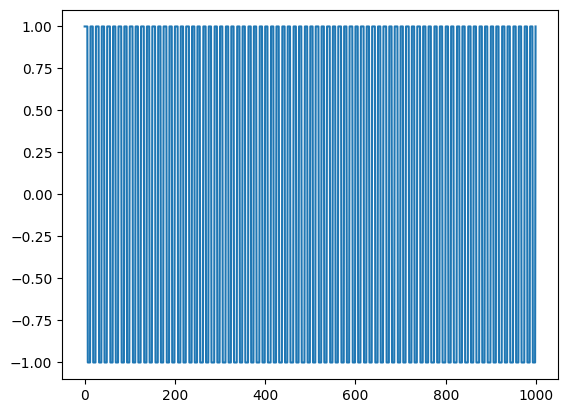

In [627]:
plt.plot(signal.square(2 * np.pi * omega * t))

In [1262]:
def simulation(omega, gamma, b, bm, x0, x0m, delta_t, ref, alpha, N):
    x = x0
    xdot = 0
    xm = x0m
    xdotm = 0
    xs = np.zeros(N)
    xms = np.zeros(N)
    theta = 1
    thetas = np.zeros(N)
    us = np.zeros(N)
    for i in range(N):
        uc = -2*xdot+1*ref[i]
        us[i] = uc
        thetas[i] = theta
        xddot = -(omega**2)*x-gamma*xdot + b*theta*uc
        xdot = xdot + xddot*delta_t
        x = x + xdot*delta_t
        xddotm = -(omega**2)*xm-gamma*xdotm + bm*uc
        xdotm = xdotm + xddotm*delta_t
        xm = xm + xdotm*delta_t
        theta= theta+delta_t*(-alpha*xm*(x-xm))
        xs[i] = x
        xms[i] = xm
    return xs, xms, us, thetas

In [1263]:
t = np.linspace(0, 500, 5000)
ref = signal.square(2 * np.pi * 0.05 * t)
ref = 0.5*(1+ref)
ref = ref
xs, xms, us, thetas = simulation(2*np.pi*0.1, 0.1, 2, 0.5, 5, 0, np.diff(t)[0], ref, 0.01, t.shape[0])

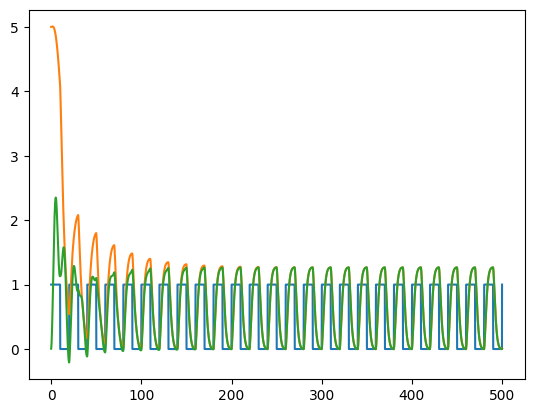

In [1264]:
plt.plot(t, ref/ref.max())
plt.plot(t, xs)
plt.plot(t, xms)

In [1]:
plt.plot(t, thetas)
#plt.plot(states[0,:]-ref_states[0,:])#plt.plot(states[0,:])
plt.show()

NameError: name 'plt' is not defined

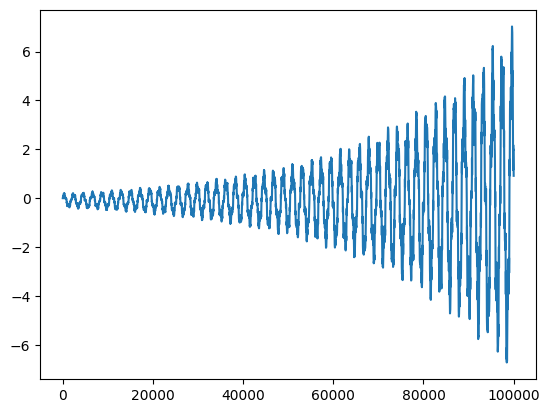

In [1096]:
#plt.plot(filt_c[:100000])
plt.plot(alphas[:])